In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data
----------

In [302]:
df = pd.read_csv('../Notebooks/results_compiled.csv', )
DATASET = 'Fashion'
df = df[df.Dataset == DATASET]
df.head()
print(df.shape)

(120, 19)


## Clean Up and Adding Derived Columns
---------

In [303]:
#df['Optimizer'] = pd.Series([x.strip() for x in df.Optimizer])
#df['ModelType'] = df['Model'] + "_" + df['Num_layers']
#df['Efficiency'] = (df['Best_test'] / (df['Best_test_at'] + 1))*np.sqrt((1e9 - df['Num_parameters']))
df.sort_values('Best_test')[df.Model == 'mlpWide']


C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_14528\2528628763.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values('Best_test')[df.Model == 'mlpWide']


,Unnamed: 0,Dataset,Backprop,Model,Num_layers,Batchsize,LearningRate,TotalEpochs,Num_parameters,Optimizer,Best_train,Best_test,Best_test_at,Avg_time,Initialization,AvgGenError,ModelType,ID,Efficiency
170,179,Fashion,backprop,mlpWide,2layers,4096,0.0050,98,255050,SGDM,0.915719,0.880981,49,9.584079,orthogonal_,0.023838,mlpWide_2layers,0,0.001415
169,178,Fashion,backprop,mlpWide,2layers,4096,0.0050,98,255050,Adam,0.963536,0.892212,36,10.101085,orthogonal_,0.054691,mlpWide_2layers,0,0.001937
175,184,Fashion,backprop,mlpWide,3layers,4096,0.0050,98,255050,Adam,0.983433,0.894165,9,10.762609,orthogonal_,0.086327,mlpWide_3layers,0,0.007182
177,186,Fashion,backprop,mlpWide,3layers,4096,0.0050,98,255050,SGD,0.993984,0.896606,21,10.406429,orthogonal_,0.097327,mlpWide_3layers,0,0.003274
173,182,Fashion,backprop,mlpWide,3layers,4096,0.0005,98,255050,SGDM,0.994611,0.897095,49,9.865367,orthogonal_,0.098024,mlpWide_3layers,0,0.001441
176,185,Fashion,backprop,mlpWide,3layers,4096,0.0050,98,255050,SGDM,0.995274,0.897339,0,11.380743,orthogonal_,0.098356,mlpWide_3layers,0,0.072080
171,180,Fashion,backprop,mlpWide,2layers,4096,0.0050,98,255050,SGD,0.980399,0.897339,42,9.828973,orthogonal_,0.082224,mlpWide_2layers,0,0.001676
167,176,Fashion,backprop,mlpWide,2layers,4096,0.0005,98,255050,SGDM,0.981463,0.897705,47,9.626261,orthogonal_,0.083804,mlpWide_2layers,0,0.001502
174,183,Fashion,backprop,mlpWide,3layers,4096,0.0005,98,255050,SGD,0.998710,0.897705,41,9.944123,orthogonal_,0.102184,mlpWide_3layers,0,0.001717
168,177,Fashion,backprop,mlpWide,2layers,4096,0.0005,98,255050,SGD,0.994681,0.897705,35,10.205885,orthogonal_,0.097080,mlpWide_2layers,0,0.002003


In [304]:
df['Best_test'] = df['Best_test'].astype('float32')

## Plotting Test Accuracy against Parameters
-----------

In [305]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

kan_
                Best_test
Num_parameters           
254164           0.785156
525652           0.789551
1109588          0.886353
---
mlp_
                Best_test
Num_parameters           
25514            0.876587
52842            0.885254
111594           0.888672
---
mlpW
                Best_test
Num_parameters           
255050           0.899414
---


C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_14528\1896499039.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.01, 1.02))


Text(0.5, 1.0, 'Test Acc under Backprop Training Schemes (Fashion)')

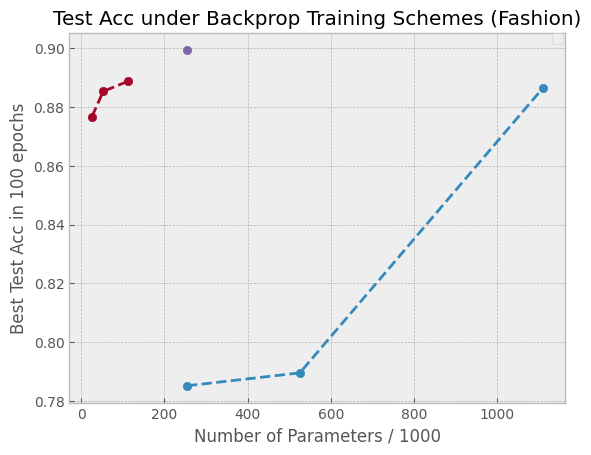

In [306]:
plt.style.use( 'bmh')

fig, axes = plt.subplots()

colors = [[0,0,.1], [0,0,.5], [0,0,1]]
for ma in ['kan_', 'mlp_', 'mlpW']:
    print(ma)
    sq = df[df.ModelType.apply(lambda x: x[:4]) ==ma]
    sq = sq[['ModelType', 'Num_parameters', 'Best_test']]; label = list(sq.ModelType)[0]
    sq2 = sq.groupby('Num_parameters').max()
    sq2 = sq2[['Best_test']]; print(sq2)
    axes.scatter(sq2.index/1000, sq2.Best_test)
    axes.plot(sq2.index/1000, sq2.Best_test, linestyle = '--')
    #axes.plot(sq2.index/1000, sq2.Best_test, alpha = 1, linestyle='--', linewidth = 1.5, marker = 'o')
    print('---')


#for model in set(np.unique(df['ModelType'])):
#    sa = df[(df.ModelType ==model)]
#    axes.plot(np.min(sa.Num_parameters/1000), np.max(sa.Best_test), label = model)

#plt.ylim(0.8, 1)
plt.xlabel("Number of Parameters / 1000")
plt.ylabel("Best Test Acc in 100 epochs")
plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.title("Test Acc under Backprop Training Schemes (" + DATASET + ")")


## Plotting Efficiency and Epoch Times
-------

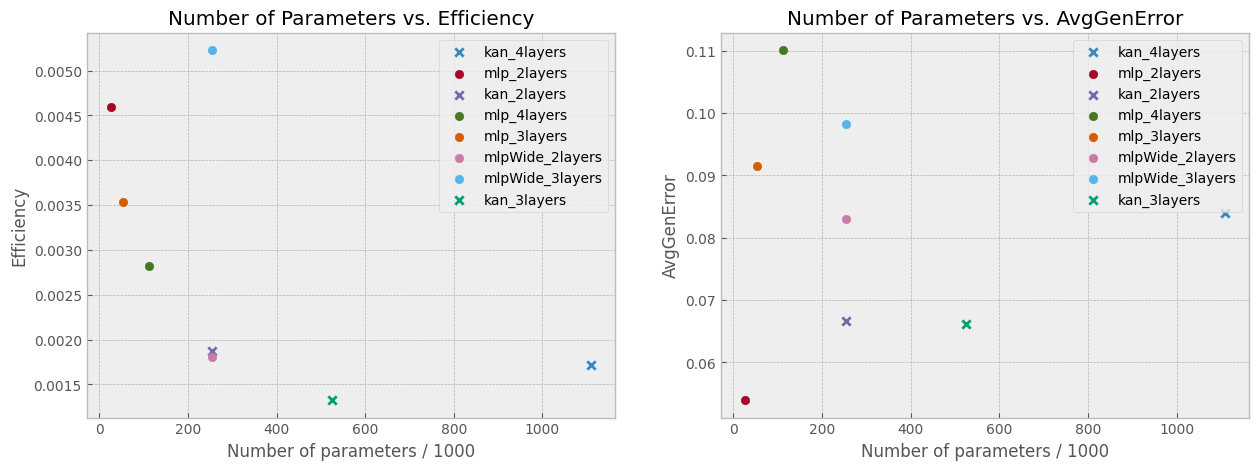

In [307]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5)); idx = 0
for metric in ['Efficiency', 'AvgGenError']:
    for model in set(np.unique(df['ModelType'])):
        sa = df[(df.ModelType ==model)]
        mark = 'o' if 'mlp' in model else 'x'
        axes[idx].scatter(np.max(sa.Num_parameters/1000), np.median(sa[metric]), marker = mark, label = model, alpha = 1)
        axes[idx].set_title("Number of Parameters vs. " + metric)
        axes[idx].set_xlabel("Number of parameters / 1000")
        axes[idx].set_ylabel(metric)
        axes[idx].legend()
    idx += 1

## Bar Plot of Best Achieved Model Performance Under Any Training Scheme
------------

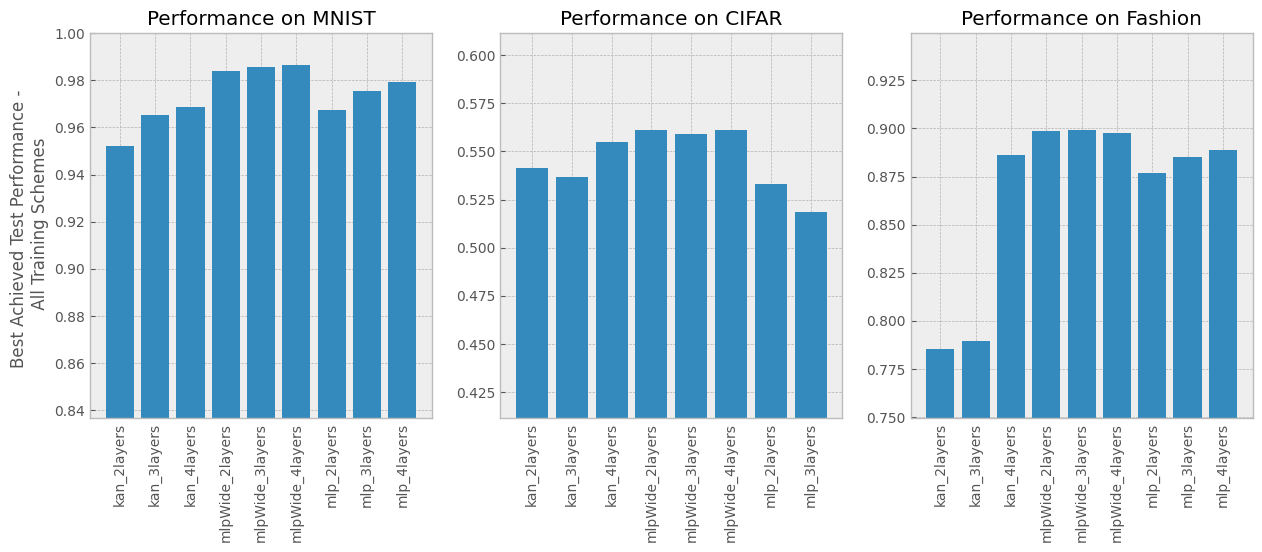

In [309]:
df = pd.read_csv('../Notebooks/results_compiled.csv', )
i = 0
fig, axes = plt.subplots(1,3,figsize = (15,5))
for DATASET in ['MNIST', 'CIFAR', 'Fashion']:
    zs = df[df.Dataset == DATASET]
    zs = zs.groupby("ModelType", group_keys=True)[['Best_test']].max()
    axes[i].bar(zs.index, zs.Best_test);
    
    maxperf = np.max(zs.Best_test)
    axes[i].set_ylim(maxperf - 0.15, np.min([1.0, maxperf + 0.05]))
    #fig.xticks(rotation = 90)
    axes[i].tick_params('x', labelrotation=90)
    if i == 0:
        axes[i].set_ylabel("Best Achieved Test Performance - \n All Training Schemes")
    axes[i].set_title("Performance on " + DATASET); i+=1

In [288]:

import torchtext
from torchtext.datasets import IMDB
imdb = IMDB(root = '../data', split = 'train')

ImportError: cannot import name 'DILL_AVAILABLE' from 'torch.utils.data.datapipes.utils.common' (C:\Users\shairozs\.conda\envs\pytorch2\Lib\site-packages\torch\utils\data\datapipes\utils\common.py)

[Text(0, 1, 'kan_2layers'),
 Text(0, 2, 'kan_3layers'),
 Text(0, 3, 'kan_4layers'),
 Text(0, 4, 'mlpWide_2layers'),
 Text(0, 5, 'mlpWide_3layers'),
 Text(0, 6, 'mlpWide_4layers'),
 Text(0, 7, 'mlp_2layers'),
 Text(0, 8, 'mlp_3layers')]

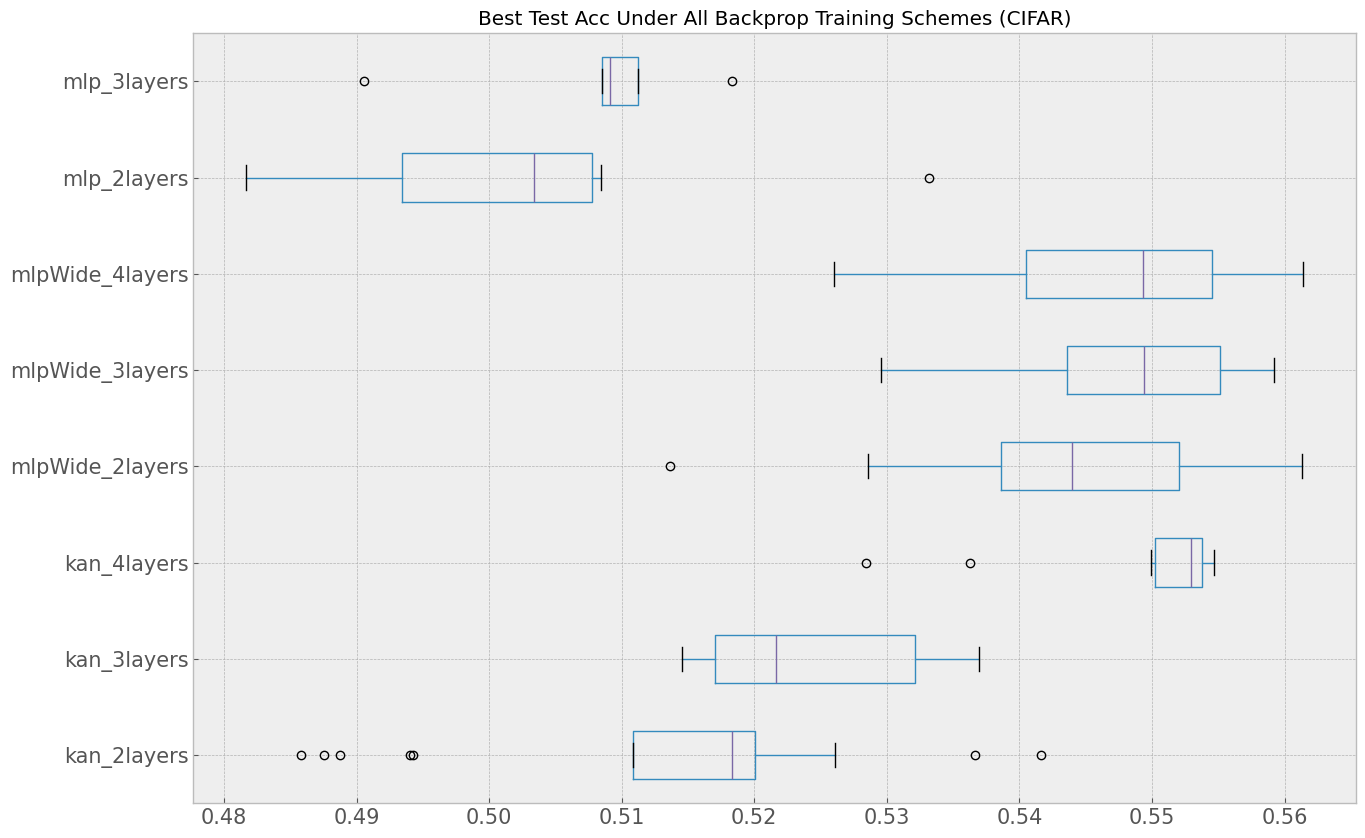

In [296]:
DATASET = 'CIFAR'
zs = df[df.Dataset == DATASET]
zs = zs.groupby("ModelType", group_keys=True)[['Best_test']]


def tick_tfm(lab, zs):
        return(lab + " [" + str(np.max(zs[zs.ModelType == lab].Num_parameters))) + "]"

zs.boxplot(figsize = (15,10), fontsize = 15,  subplots = 0, vert=False)
#plt.yticks(rotation = 90)
plt.title("Best Test Acc Under All Backprop Training Schemes (" + DATASET + ")")
#maxperf = np.max(zs.max())
#minperf = np.min(zs.min())
#plt.ylim(minperf - 0.01, np.min([1.0, maxperf + 0.05]))
ax = plt.gca()
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = [l.split(",")[0].replace("(","") for l in labels]
#labels = [tick_tfm(x, df[df.Dataset == 'CIFAR']) for x in labels]
ax.set_yticklabels(labels)


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

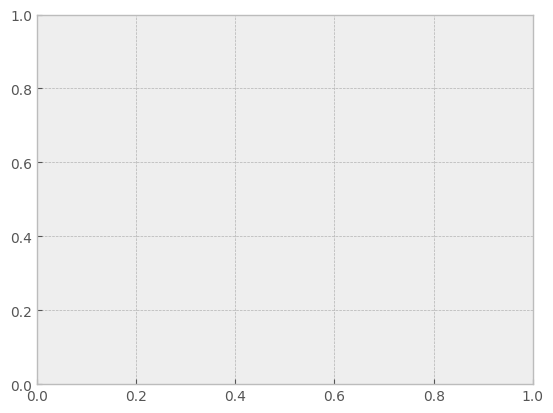

In [189]:
zs = df.groupby("ModelType", group_keys=True)[['Best_test']].max()


plt.boxplot(zs.index, zs.Best_test)
plt.xticks(rotation = 90)
plt.ylim(0.30, 1)
plt.title("Best Test Acc Under All Training Schemes")